In [73]:
import pygad
import numpy
import time
import math

In [74]:

maze = [[0,0,0,0,0,0,0,0,0,0,0,0],
        [0,1,1,1,0,1,1,1,0,1,1,0],
        [0,0,0,1,1,1,0,1,0,0,1,0],
        [0,1,1,1,0,1,0,1,1,1,1,0],
        [0,1,0,1,0,0,1,1,0,0,1,0],
        [0,1,1,0,0,1,1,1,0,1,1,0],
        [0,1,1,1,1,1,0,1,1,1,0,0],
        [0,1,0,1,1,0,0,1,0,1,1,0],
        [0,1,0,0,0,1,1,1,0,0,1,0],
        [0,1,0,1,0,0,1,0,1,0,1,0],
        [0,1,0,1,1,1,1,1,1,1,1,0],
        [0,0,0,0,0,0,0,0,0,0,0,0]]


In [75]:

#definiujemy parametry chromosomu
#geny to string-i: 0-up,1-right,2-down,3-left
gene_space = [0,1,2,3]


In [76]:

#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    x = 1
    y = 1

    xstop = 10
    ystop = 10

    steps = 0

    repeatSteps = 0

    walls = 0

    def distance(x,y,xstop,ystop):
        return math.fabs(xstop-x) + math.fabs(ystop-y)
    
    for i in range(len(solution)):
        if solution[i] == 0:
            if maze[y-1][x] == 1:
                if i != 0 and solution[i-1] == 2:
                    repeatSteps += 1
                else: 
                    y -= 1
            else:
                walls += 1
        elif solution[i] == 1:
            if maze[y][x+1] == 1:
                if i != 0 and solution[i-1] == 3:
                    repeatSteps += 1
                else: 
                    x += 1
            else:
                walls += 1
        elif solution[i] == 2:
            if maze[y+1][x] == 1:
                if i != 0 and solution[i-1] == 0:
                    repeatSteps += 1
                else: 
                    y += 1
            else:
                walls += 1
        elif solution[i] == 3:
            if maze[y][x-1] == 1:
                if i != 0 and solution[i-1] == 1:
                    repeatSteps += 1
                else: 
                    x -= 1
            else:
                walls += 1
        steps += 1                        
        if x == xstop and y == ystop:
            break

    fitness = -(distance(x,y,xstop,ystop) + steps + repeatSteps + walls)
    return fitness            

fitness_function = fitness_func


In [77]:

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 400
num_genes = 30

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 200
num_generations = 500
keep_parents = 20

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 2


Time taken to run the GA :  25.40865969657898
Parameters of the best solution : [1. 1. 2. 1. 1. 0. 1. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 0. 3. 1. 1.
 2. 2. 0. 1. 1. 2.]
Minimal number of steps to pass = -20.0
Number of generations passed is 500


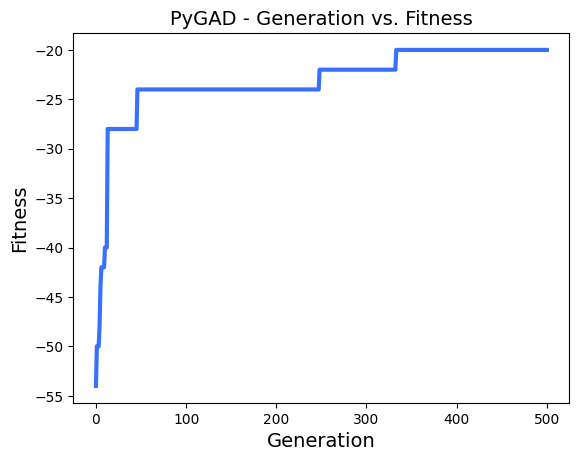

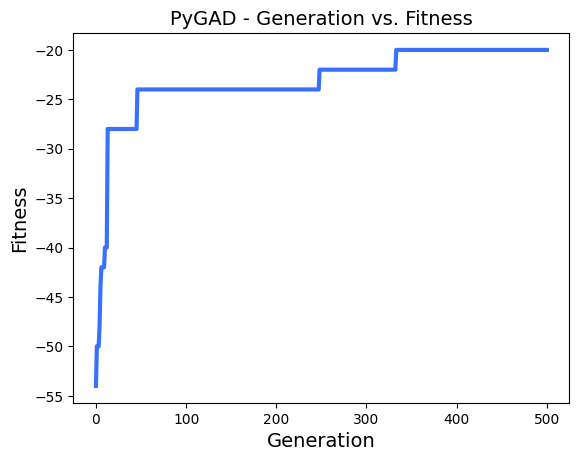

In [78]:

#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
start = time.time()
ga_instance.run()
end = time.time()
print("Time taken to run the GA : ", end-start)

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Minimal number of steps to pass = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = numpy.sum(solution)
# print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()
